https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47

Support vector machine is highly preferred by many as it produces significant accuracy with less computation power. Support Vector Machine, abbreviated as SVM can be used for both regression and classification tasks. But, it is widely used in classification objectives.

### What is Support Vector Machine?

- The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

- To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.

### Large Margin Intuition

- In logistic regression, we take the output of the linear function and squash the value within the range of [0,1] using the sigmoid function. If the squashed value is greater than a threshold value(0.5) we assign it a label 1, else we assign it a label 0. In SVM, we take the output of the linear function and if that output is greater than 1, we identify it with one class and if the output is -1, we identify is with another class. Since the threshold values are changed to 1 and -1 in SVM, we obtain this reinforcement range of values([-1,1]) which acts as margin.

### Cost Function and Gradient Updates

- In the SVM algorithm, we are looking to maximize the margin between the data points and the hyperplane. The loss function that helps maximize the margin is hinge loss.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearnex import patch_sklearn
# patch_sklearn()

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


import warnings
warnings.filterwarnings("ignore")

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
# Read data into dataframe
df = pd.read_excel('C:/Users/Ricky K Nguyen/Desktop/Institute of Data/Master Course Content - Data Science/DATA/Iris.xls')

# Strip whitespace in Species_name string values
df['Species_name'] = df.Species_name.str.strip()

# We will remove one class so it become a binary classification problem
df = df[df.Species_name.isin(['Setosa', 'Versicolor'])]

In [3]:
df.head()

,Species_No,Petal_width,Petal_length,Sepal_width,Sepal_length,Species_name
0,1,0.2,1.4,3.5,5.1,Setosa
1,1,0.2,1.4,3.0,4.9,Setosa
2,1,0.2,1.3,3.2,4.7,Setosa
3,1,0.2,1.5,3.1,4.6,Setosa
4,1,0.2,1.4,3.6,5.0,Setosa


In [243]:
# Also, we will be using only 2 features, i.e petal_length, sepal_length for simple visualization
df = df[['Petal_length', 'Sepal_length', 'Species_name']]
df.head()

,Petal_length,Sepal_length,Species_name
0,1.4,5.1,Setosa
1,1.4,4.9,Setosa
2,1.3,4.7,Setosa
3,1.5,4.6,Setosa
4,1.4,5.0,Setosa


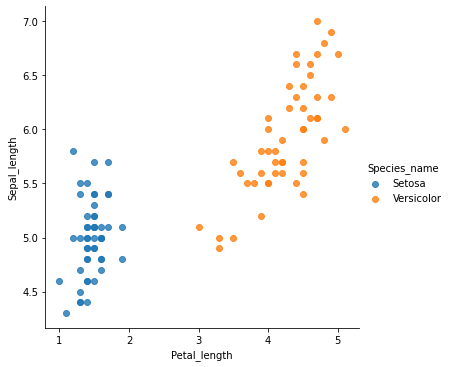

In [244]:
# Visualise 2-D graph
sns.lmplot(x='Petal_length', y='Sepal_length', hue='Species_name', data=df, fit_reg=False)

From the above graph, we can infer that a linear line can be used to separate the data points

### Use Scikit-learn Library

In [246]:
df.head()

,Petal_length,Sepal_length,Species_name
0,1.4,5.1,Setosa
1,1.4,4.9,Setosa
2,1.3,4.7,Setosa
3,1.5,4.6,Setosa
4,1.4,5.0,Setosa


In [8]:
# Prepare data for computation
X = df[['Petal_length', 'Sepal_length']].values
y = df['Species_name'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

1.0


In [10]:
vector = clf.support_vectors_
vector

array([[1.7, 5.4],
       [1.9, 4.8],
       [3. , 5.1],
       [3.3, 4.9]])

In [17]:
df.head()

,Species_No,Petal_width,Petal_length,Sepal_width,Sepal_length,Species_name
0,1,0.2,1.4,3.5,5.1,Setosa
1,1,0.2,1.4,3.0,4.9,Setosa
2,1,0.2,1.3,3.2,4.7,Setosa
3,1,0.2,1.5,3.1,4.6,Setosa
4,1,0.2,1.4,3.6,5.0,Setosa


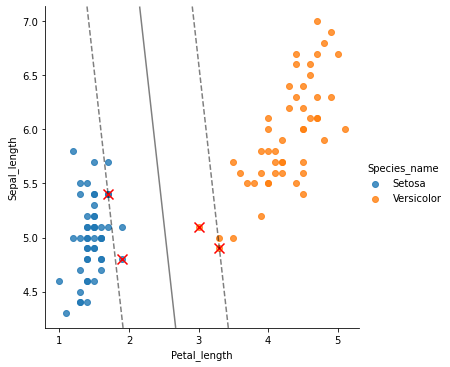

In [18]:
# plt.scatter(X[:, 0], X[:, 1], c = y, s = 30)
sns.lmplot(x='Petal_length', y='Sepal_length', hue='Species_name', data=df, fit_reg=False)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors = 'k', levels = [-1, 0, 1], alpha = 0.5, linestyles = ['--', '-', '--'])
ax.scatter(vector[:,0], vector[:,1], color='r', marker='x', s=10*10)
plt.show()